# HW8
## EDA

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
rand_state = 1000

In [69]:
df = pd.read_csv('Logan_housing.csv')
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   Garage Capacity    4110 non-null   int64 
 3   HOA Fee            4110 non-null   int64 
 4   Irregular Shape    4110 non-null   object
 5   Quadrant           4110 non-null   object
 6   School District    4110 non-null   object
 7   Sold Terms         4110 non-null   object
 8   Total Bedrooms     4110 non-null   int64 
 9   Total Bathrooms    4110 non-null   int64 
 10  Total Square Feet  4110 non-null   int64 
 11  Year Built         4110 non-null   int64 
 12  Zip                4110 non-null   int64 
 13  year_sold          4110 non-null   int64 
 14  month_sold         4110 non-null   int64 
 15  built_after_2000   4110 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 513.

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sold Price,4110.0,282125.245499,117864.718806,13000.0,214000.0,260000.0,324900.00,1900000.0
DOM,4110.0,40.550608,51.571991,1.0,6.0,23.0,56.00,712.0
Garage Capacity,4110.0,1.826034,1.094091,0.0,1.0,2.0,2.00,20.0
HOA Fee,4110.0,36.178345,69.565512,0.0,0.0,0.0,65.00,1050.0
Total Bedrooms,4110.0,3.821168,1.182697,1.0,3.0,4.0,5.00,9.0
Total Bathrooms,4110.0,2.577372,0.851165,1.0,2.0,3.0,3.00,7.0
Total Square Feet,4110.0,2370.429440,1049.690077,520.0,1583.0,2141.0,2941.75,10890.0
Year Built,4110.0,1989.287105,31.284714,1879.0,1976.0,2001.0,2012.00,2020.0
Zip,4110.0,84327.371533,8.617330,84305.0,84321.0,84321.0,84335.00,84341.0
year_sold,4110.0,2019.010462,0.816678,2018.0,2018.0,2019.0,2020.00,2020.0


In [72]:
df.nunique()

Sold Price           1217
DOM                   248
Garage Capacity        14
HOA Fee                96
Irregular Shape         2
Quadrant                4
School District         2
Sold Terms              6
Total Bedrooms          9
Total Bathrooms         7
Total Square Feet    2009
Year Built            136
Zip                    16
year_sold               3
month_sold             12
built_after_2000        2
dtype: int64

This shows us that we need to change some of the variables to categorical variables. 

In [73]:
categorical = ['Irregular Shape', 'Quadrant', 'School District', 'Sold Terms', 'Zip', 'Year Built', 'year_sold', 'month_sold', 'built_after_2000']

In [74]:
for col in categorical:
    df[col]=df[col].astype("category")

In [75]:
df.isna().sum()

Sold Price           0
DOM                  0
Garage Capacity      0
HOA Fee              0
Irregular Shape      0
Quadrant             0
School District      0
Sold Terms           0
Total Bedrooms       0
Total Bathrooms      0
Total Square Feet    0
Year Built           0
Zip                  0
year_sold            0
month_sold           0
built_after_2000     0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold Price         4110 non-null   int64   
 1   DOM                4110 non-null   int64   
 2   Garage Capacity    4110 non-null   int64   
 3   HOA Fee            4110 non-null   int64   
 4   Irregular Shape    4110 non-null   category
 5   Quadrant           4110 non-null   category
 6   School District    4110 non-null   category
 7   Sold Terms         4110 non-null   category
 8   Total Bedrooms     4110 non-null   int64   
 9   Total Bathrooms    4110 non-null   int64   
 10  Total Square Feet  4110 non-null   int64   
 11  Year Built         4110 non-null   category
 12  Zip                4110 non-null   category
 13  year_sold          4110 non-null   category
 14  month_sold         4110 non-null   category
 15  built_after_2000   4110 non-null   category
dtypes: cat

To get an idea for the distribution of the Sold Price, let's look at a histogram. 

<Figure size 864x432 with 0 Axes>

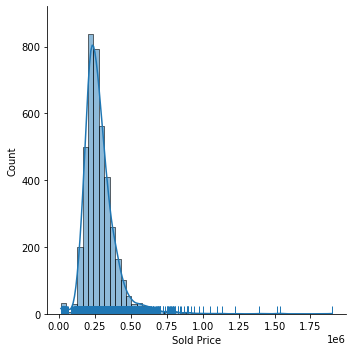

In [77]:
# now we plot a histogram of df2 as well as a chart that shows what the distribution of the entire data frame
plt.figure(figsize=(12,6))
sns.displot(df['Sold Price'], kde=True, bins=50, rug=True)
plt.show()

Let's see how the number of sales compares accross the different months. 

In [78]:
df_bar=df[['month_sold', 'Sold Price']].groupby(by='month_sold').count().sort_values(by='month_sold', ascending=True).reset_index()
df_bar.columns.values[1]='Sales_count'
df_bar

,month_sold,Sales_count
0,1,213
1,2,220
2,3,313
3,4,306
4,5,413
5,6,468
6,7,471
7,8,475
8,9,362
9,10,378


Let's visualize the table above. 

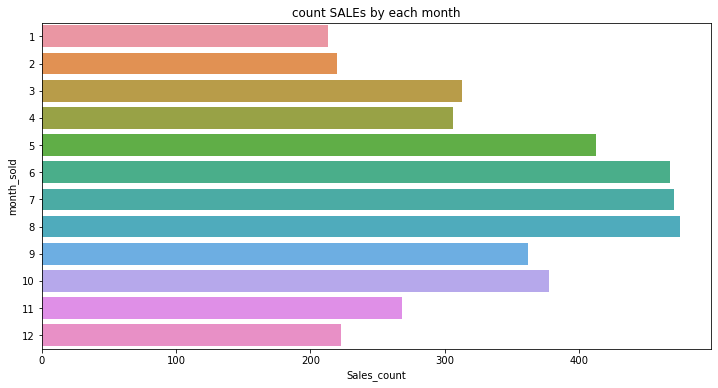

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'month_sold', x = 'Sales_count', data = df_bar )
plt.title('count SALEs by each month')
plt.show()

## SVM – Regression

In [80]:
df = pd.get_dummies(df, drop_first=True)

In [81]:
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Total Bedrooms,Total Bathrooms,Total Square Feet,Irregular Shape_Yes,Quadrant_NW,Quadrant_SE,...,month_sold_4,month_sold_5,month_sold_6,month_sold_7,month_sold_8,month_sold_9,month_sold_10,month_sold_11,month_sold_12,built_after_2000_1
0,176000,5,2,0,3,1,1031,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,225000,6,2,0,4,2,2091,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,274900,14,2,0,3,1,2016,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,175000,16,1,0,4,1,1920,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,179000,29,0,0,4,2,1329,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scale = StandardScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)

In [84]:
y = df_sc['Sold Price']
X = df_sc.drop('Sold Price', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [85]:
from sklearn.svm import SVR

In [86]:
# Fitting SVM regression to the Training set
SVM_regression = SVR()
SVM_regression.fit(X_train, y_train)

SVR()

In [87]:
# Predicting the Test set results
y_hat = SVM_regression.predict(X_test)

In [88]:
df_predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
df_predictions.head()

,y_test,y_hat
3940,0.830500,0.682649
2470,0.312895,0.196145
351,-0.620492,-0.486309
3137,-0.485575,-0.351858
2605,0.211071,0.402756


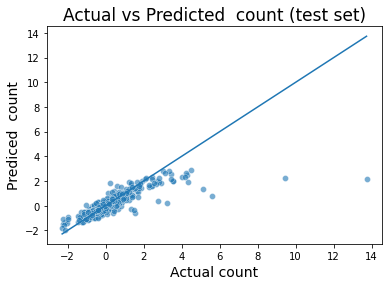

In [89]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

In [90]:
SVM_regression.score(X_test, y_test)

0.6542967523480033

In [91]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.65

In [92]:
my_param_grid = {'C': [1,10,100], 'gamma': ['scaled',0.1,0.01], 'kernel': ['rbf']}

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': ['scaled', 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [95]:
grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 , scoring=None)
# verbose just means the text output describing the process. (the greater the number the more detail you will get)

In [96]:
# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................C=1, gamma=scaled, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=scaled, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=scaled, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=scaled, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=scaled, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END ........................C=1, gamma=0.01,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': ['scaled', 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [97]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [98]:
grid.best_estimator_

SVR(C=10, gamma=0.01)

In [99]:
y_hat_optimized = grid.predict(X_test)

In [100]:
df_predictions['y_hat_optimized'] = y_hat_optimized
df_predictions.head()

,y_test,y_hat,y_hat_optimized
3940,0.830500,0.682649,0.459764
2470,0.312895,0.196145,-0.014540
351,-0.620492,-0.486309,-0.447543
3137,-0.485575,-0.351858,-0.353961
2605,0.211071,0.402756,0.524140


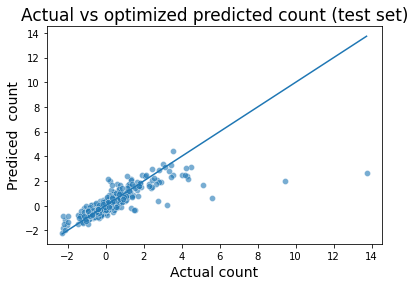

In [101]:
sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs optimized predicted count (test set)', fontsize=17)
plt.show()

In [102]:
grid.score(X_test, y_hat_optimized)

1.0

In [103]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.65

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
NMSE = cross_val_score(estimator = SVR(C=10, gamma=0.01), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

In [106]:
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

0.511

## SVM – Classification

In [107]:
avg_DOM = df['DOM'].mean()
liquid = np.where(df['DOM']< avg_DOM,1,0)

In [108]:
pd.crosstab(liquid,liquid, normalize='all')*100

col_0,0,1
row_0,,
0,34.355231,0.000000
1,0.000000,65.644769


The dataset is relatively balanced. 

In [109]:
df['liquid']=liquid
df.drop('DOM', axis=1, inplace=True)
df.columns

Index(['Sold Price', 'Garage Capacity', 'HOA Fee', 'Total Bedrooms',
       'Total Bathrooms', 'Total Square Feet', 'Irregular Shape_Yes',
       'Quadrant_NW', 'Quadrant_SE', 'Quadrant_SW',
       ...
       'month_sold_5', 'month_sold_6', 'month_sold_7', 'month_sold_8',
       'month_sold_9', 'month_sold_10', 'month_sold_11', 'month_sold_12',
       'built_after_2000_1', 'liquid'],
      dtype='object', length=181)